In [0]:
# Fill in your name using the format below and student ID number
your_name = "KUBICA, MICHAŁ"
student_id = "1551019"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.


In [0]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras import optimizers

In [0]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi MICHAŁ, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/assignment-3-maskubica/models' # For Google Colab
#base_dir = '/home/michal/Studies/UWr/8/Web_Information_Retrieval_and_Data_Mining/assignment3/assignment-3-maskubica/models'

In [0]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

In [0]:
# import scipy.io
# import numpy as np
# mat_test = scipy.io.loadmat('data/test_32x32.mat')
# mat_train = scipy.io.loadmat('data/train_32x32.mat')

# X_test = mat_test['X']
# X_train = mat_train['X']

# X1 = np.zeros(3*32*32*np.shape(X_test)[3]).reshape((np.shape(X_test)[3],32,32,3))
# X2 = np.zeros(3*32*32*np.shape(X_train)[3]).reshape((np.shape(X_train)[3],32,32,3))


# for i in range(np.shape(X_test)[3]):
#     X1[i] = X_test[:,:,:,i]

# for i in range(np.shape(X_train)[3]):
#     X2[i] = X_train[:,:,:,i]
    
# Xr = np.concatenate((X1, X2))
# #Xr=X2
# Xr = Xr / 255.


# from tensorflow.keras.utils import to_categorical

# y = np.concatenate((mat_test['y'],mat_train['y']))
# yr = to_categorical(y)
# yr = np.delete(yr, (0), axis=1)

In [0]:
#print(np.shape(Xr))
#print(np.shape(yr))

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

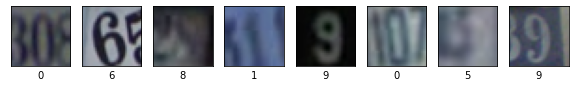

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        #axes[n].set_xlabel((np.argmax(y[n]))%10) # Label is index+1
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(8)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    # if a json description is available, load config and then weights
    if os.path.isfile(os.path.join(base_dir, name+'.json')):
      json_file = open(os.path.join(base_dir, name+'.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      model = model_from_json(loaded_model_json)
      model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
    else:
      model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  path = os.path.join(base_dir, name+extension)
  model.save(path)
  size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
  if size > 100*1024*1024:
    print("Model larger than 100MB, storing weights only.")
    model.save_weights(path)
    model_json = model.to_json()
    with open(os.path.join(base_dir, name+".json"), "w") as json_file:
        json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_227 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_228 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_229 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_230 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_231 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_232 (Dense)   

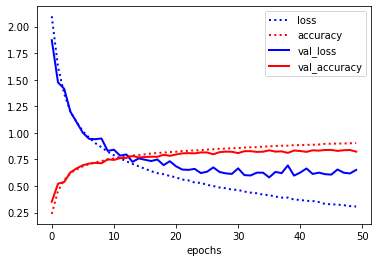

In [0]:
def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.000015, rho=0.9, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
run_evaluation("model_1_1_test", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=128)
answer_q_1_1 = """I followed the Ian Goodfellow advice about making network more deep instead of increasing size of the layers.
Input size of the image is 3072, so I built network, where each subsequent layer has half as many nodes as previous layer.
I focused on tuning optimizer to achieve best accuracy. I used momentum parameter (RMSprop optimizer) to speed up reaching minimum of cost function.
The typical value of momentum is 0.9. Choosing learning rate parameter was crucial-lr=0.000015 was one of the best."""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [0]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

Loading model from file
Success!
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_30 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_407 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_408 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_409 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_410 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_411 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_412 (Dense)   

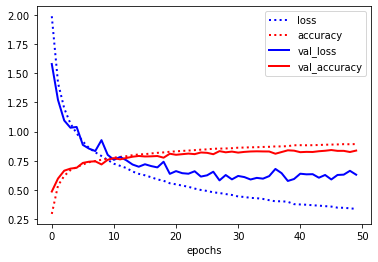

In [0]:
# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00005, rho=0.9, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir,
               train=False, epochs=50, batch_size=128)
answer_q_1_2 = """I used the same technique as in q_1_1, only dropping first layer and starting from layer with 512 nodes.
However it was hard to beat the accuracy score obtained by previous model. 
Obviously model learns faster, because the network is smaller and there are fewer weights to optimize.
The model achieves the same validation accuracy.
It overfits a little bit, but this issue can be easly fixed using early stopping.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_40 (Reshape)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_474 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_102 (Dropout)        (None, 512)               0         
_________________________________________________________________
batch_normalization_66 (Batc (None, 512)               2048      
_________________________________________________________________
dense_475 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_103 (Dropout

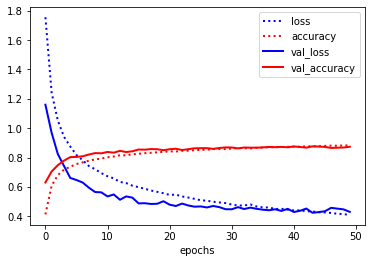

In [0]:
def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='sigmoid'))
    model.add(layers.Dropout(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(12, activation='sigmoid'))
    model.add(layers.Dropout(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=128)
answer_q_1_3 = """
In previous models there was problem with overfitting. I decided to use dropout layer to prevents this effect.
Looking at learning curves one can see that at first validation accuracy is better than accuracy - this is caused by hiding some nodes for training (dropout).
I also used batch normalization layer to reduce the covariance shift. It decreased number of epochs needed to reach the minimum and increased accuracy.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 30, 30, 16)        160       
_________________________________________________________________
batch_normalization_143 (Bat (None, 30, 30, 16)        64        
_________________________________________________________________
leaky_re_lu_132 (LeakyReLU)  (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 30, 30, 16)        2320      
_________________________________________________________________
leaky_re_lu_133 (LeakyReLU)  (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_193 (Dropou

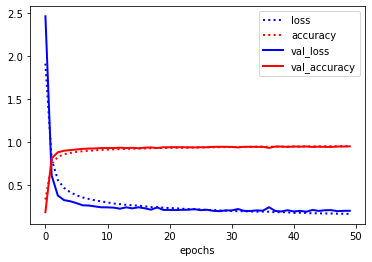

In [0]:
from tensorflow.keras.layers import LeakyReLU


def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(16, 3, input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(16, 3, padding="same"))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(32, 3, padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(32, 3, padding="same"))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, 3, padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(64, 3, padding="same"))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, 3, padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(128, 3, padding="same"))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Dropout(0.3))
  

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='sigmoid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00005, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
    #           loss='categorical_crossentropy',
    #           metrics=['accuracy'])
    
    return model
    
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
                   train=False, epochs=50, batch_size=256)
answer_q_2_1 = """
I started building my network using only convolutional layers and two dense layers (16-16 | 256-10).
After few experiments I realized that increasing number of filters with each next convolutional layer increases the performance of the model (16-32-64 | 256-10).
But the model was still easly overfitting. After introducing dropout layers, the score was 90%.
Adding batch normalization layer and optimizing dropout parameters, such that the validation accuracy almost exactly follows train accuracy, the performance increased to 92%.
The big change was made by replacing convolutional layers with blocks of two conv. layers (e.g 16-16-maxPool-32-32-maxPool...).
This method combined with introducing leaky ReLU activation and optimizing learning rate and dropout parameters, obtained the best result.
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=1e-06, 
                             rotation_range=20, 
                             width_shift_range=0.0, 
                             height_shift_range=0.0, 
                             brightness_range=None, 
                             shear_range=0.0, 
                             zoom_range=0.0, 
                             channel_shift_range=0.0, 
                             fill_mode='nearest', 
                             cval=0.0, 
                             horizontal_flip=False, 
                             vertical_flip=False, 
                             rescale=None, 
                             preprocessing_function=None, 
                             data_format='channels_last', 
                             validation_split=0.0, 
                             dtype='float32')

datagen.fit(rgb2gray(X_train))
augmented_split = datagen.flow(rgb2gray(X_train),y_train, batch_size=256), rgb2gray(X_val), y_val

Loading model from file
Success!
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 16)        160       
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)

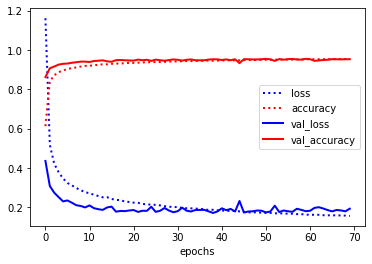

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
#augmented_split = datagen.fit(preprocessed_split)
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, generator=True, steps_per_epoch = len(X_train)/256*3,
               train=False, epochs=70, batch_size=None)
answer_q_2_2 = """
               First I observed that data cannot be transformed too much. If it does than the model cannot fit well to the data. 
               One can see that the images in SVHN dataset are very often rotated, so it was very reasonable to introduce the rotation range (5 degrees) in data augmentation.
               This allowed model to generalize more and obtain better validation score. Also the horizontal flip was introduced to build more generalized model.
               This configurations resulted in about 94,5% accuracy, which was slightly worse than well-tuned model without model augmentation. 
               At this point I decided to drop horizontal flip and increase rotation range to 20 degrees. This helped to improve the accuracy.

               With augmented data it takes much more time to train the model. Also there was need to increase steps per epoch for smoother converging.
               Still, the model was learning very slow, but the training process was very smooth. What is more, accuracy increased to 95,5%, 
               which is very close to the scores obtained by best sequential CNNs.

               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt    
from matplotlib.colors import LogNorm


def plot_missclassified_images(X, y, y_pred, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel(f"True:{(np.argmax(y[n])+1)%10}")
        axes[n].set_title(f"Predicted:{(np.argmax(y_pred[n])+1)%10}")
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

def test_accuracy():
  model = load_model_from_file(base_dir, "model_2_2")
  y_pred = model.predict(rgb2gray(X_test))
  return np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)



def plot_confusion_matrix():
    model = load_model_from_file(base_dir, "model_2_2")
    y_pred = model.predict(rgb2gray(X_test))
    y_pred_1d = np.argmax(np.round(y_pred), axis=1)
    y_test_1d = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_test_1d, y_pred_1d)
    
    #rcParams['figure.figsize'] = 12, 10
    fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
    sns.heatmap(cm+1, annot=True, norm=LogNorm(vmin=1,vmax=3), ax=ax,
            xticklabels=[1,2,3,4,5,6,7,8,9,0], yticklabels=[1,2,3,4,5,6,7,8,9,0], cmap='YlGnBu'); #annot=True to annotate cells

def plot_misclassifications():
  model = load_model_from_file(base_dir, "model_2_2")
  y_pred = model.predict(rgb2gray(X_test))

  y_pred_1d = np.argmax(y_pred, axis=1)
  y_test_1d = np.argmax(y_test, axis=1)
  y_pred_1d = (y_pred_1d+1)%10
  y_test_1d = (y_test_1d+1)%10

  y_miss = y_test_1d[y_pred_1d != y_test_1d]
  X_miss = X_test[y_pred_1d != y_test_1d]

  miss_idx = np.array(np.nonzero(y_pred_1d != y_test_1d)).reshape(-1)

  # where true label of miss image is 1
  y_miss1 = miss_idx[y_miss == 3]

  nrows = 10
  ncols = 10

  fig, ax = plt.subplots(nrows, ncols, figsize=(20,20), gridspec_kw = {'wspace':0, 'hspace':0.25})
  k=0
  for i in range(nrows):
    for j in range(ncols):
      ax[i][j].imshow(X_test[y_miss1[k]])
      ax[i][j].set_xticklabels([])
      ax[i][j].set_yticklabels([])
      idx = y_miss1[k]
      ax[i][j].set_title(f"No:{k}, Pred:{y_pred_1d[idx]}")
      k=k+1


test_accuracy_3_1 = test_accuracy()

answer_q_3_1 = """
               On the first glimpse on confusion matrix we can see that true label "1" is very often misclassified. Much more often than other classes. 
               This is probably caused by wrong labelling. SVHN dataset (32x32) originally come from larger images, which consists sets of house digits (house numbers).
               
               There are some pair of digits, which are very often confused with each other, for example: '1' and '7', '3' and '5', '6' and '8'. Obviously, those pairs of digits can be very similar.
               Surprisingly '8' and '9' are not very often confused, despite the fact, that they are similar. There are also pairs, which are almost never confused, e.g '0' and '4'. 
               The most missclassified digit, besides '1', is '3'. We will take closer look at it.

               One can see that many images are very blurry (e.g image no. 1, 10, 15, 23 ...). The digits on those images are very hard to recognize (also by human eye). 
               Another type of missclassification is caused by recognizing the wrong digit. On some pictures there are two digits visible, but only one true labelling. 
               Sometimes model recognizes the wrong digit (e.g image no. 50, 51, 56, 89...).
               What is more, more misclassifications are provided by wrong labelling. We can clearly see that on pictures no. 96 or 80.
               Also, some of the digits has very unusual shape: no: 57 and 72.
                              """
print("Answer is {} characters long".format(len(answer_q_3_1)))

Answer is 1499 characters long


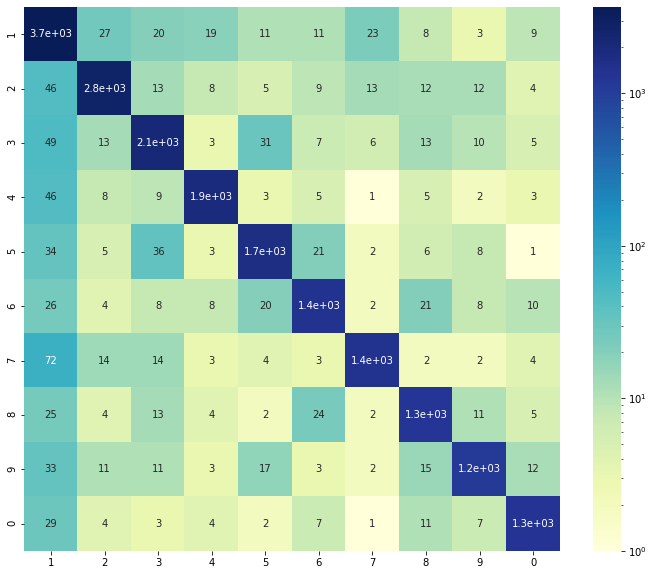

In [0]:
plot_confusion_matrix()

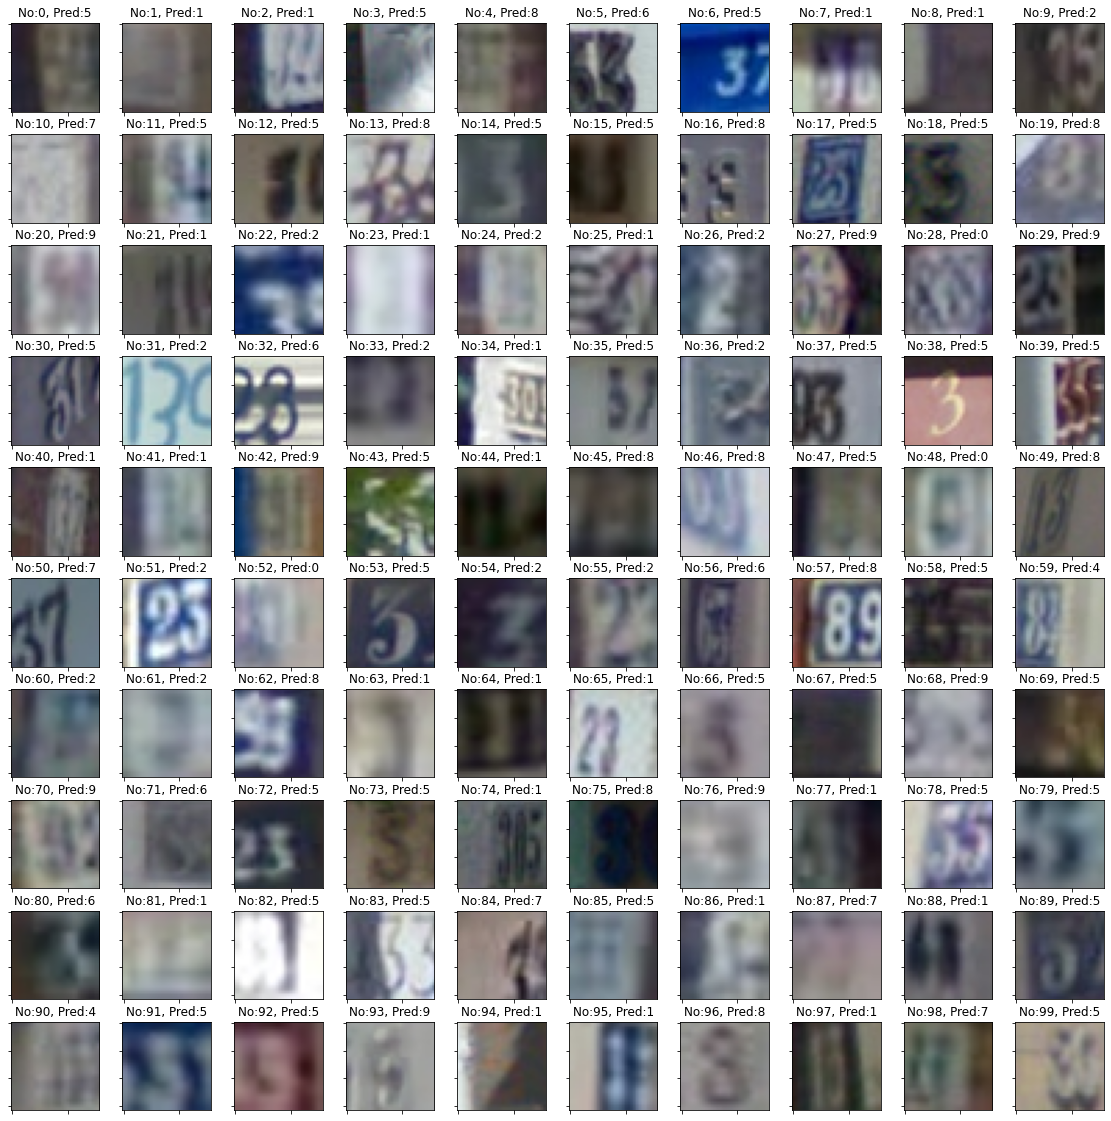

In [0]:
plot_misclassifications()

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Answer is 1035 characters long


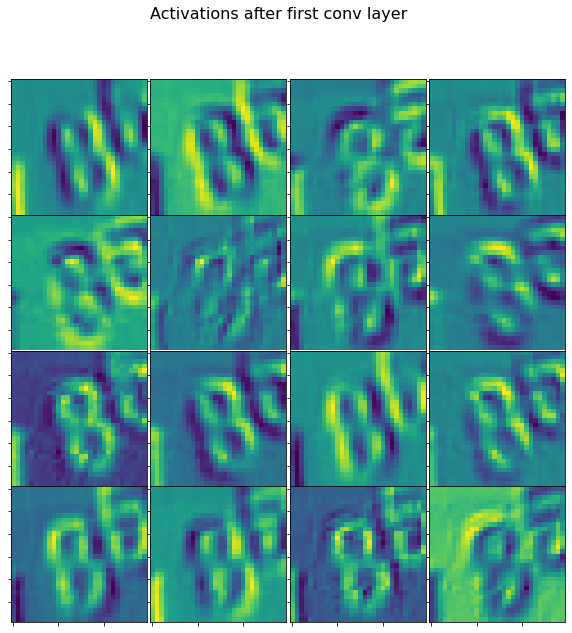

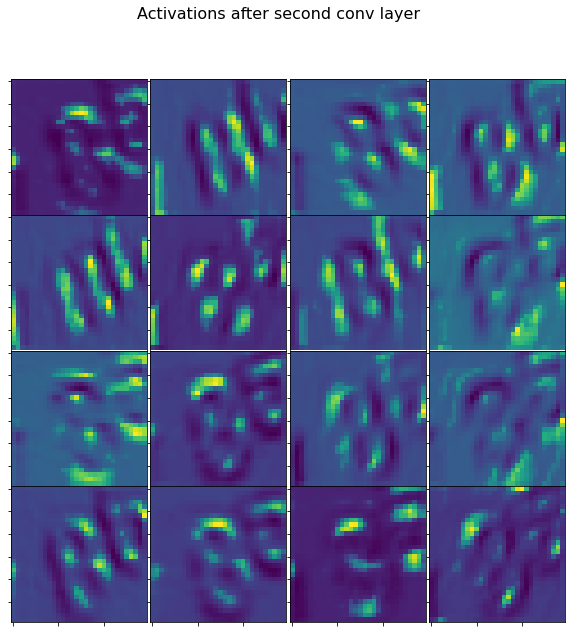

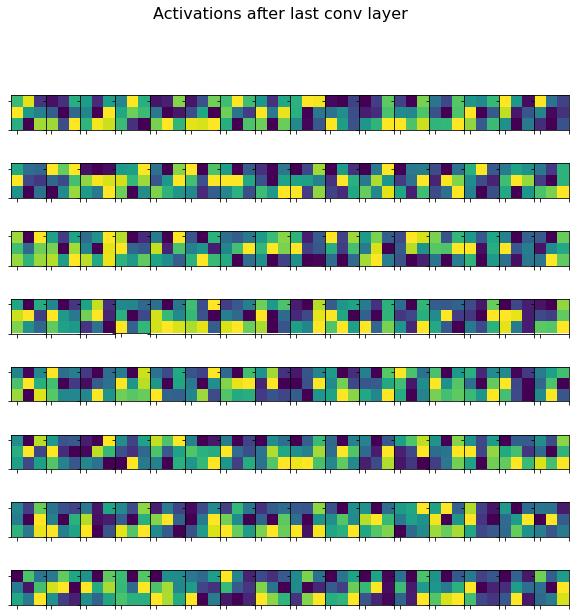

In [0]:
def plot_activation(model_name, act_index):
    model = load_model_from_file(base_dir, model_name)

    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(rgb2gray(X_test)[0].reshape(1,32,32,1))

    activation = activations[act_index]

    rows, cols= (1,1)
    if np.shape(activation)[3] == 4:
      rows, cols= (2,2)
    if np.shape(activation)[3] == 8:
      rows, cols= (2,4)
    if np.shape(activation)[3] == 16:
      rows, cols= (4,4)
    if np.shape(activation)[3] == 32:
      rows, cols= (4,8)
    if np.shape(activation)[3] == 64:
      rows, cols= (8,8)
    if np.shape(activation)[3] == 128:
      rows, cols= (8,16)


    activation_index=0
    fig, ax = plt.subplots(rows, cols, figsize=(10,10))
    for row in range(rows):
        for col in range(cols):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            ax[row][col].set_aspect('equal')
            ax[row][col].set_xticklabels([])
            ax[row][col].set_yticklabels([])
            activation_index += 1
    fig.subplots_adjust(wspace=0, hspace=0)

    if act_index == 1:
      title="first"
    if act_index == 4:
      title="second"
    if act_index == 24:
      title="last"

    fig.suptitle(f'Activations after {title} conv layer', fontsize=16)

    #return activation
def plot_activations():
  plot_activation("model_2_2", 1)
  plot_activation("model_2_2", 4)
  plot_activation("model_2_2", 24)

plot_activations()

answer_q_3_2 = """
               The functions is plotting activation maps for three convolutional layers: first, second and last. 
               On the first plot we can see that model is recognizing some shapes of digits, e.g the vertical and horizontal lines, curvy shapes etc.
               We can also see that few filters can extract digit from the background and can propagate this information further into network. 
               One of them stay inactive for given image. So probably that filter is responsible for recongnizing some pattern, which is not visible on this particural image.
               The first layer separated the digit from the backround. 
               So the second layer can focus more on the parts of the digits. Explore more on particular parts of the digit, for example recognizing holes inside digit.
               Unfortunately, the activations of the last layers are almost impossible to interpret, but we can use class activation maps to see what is network looking at analyzing input image.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

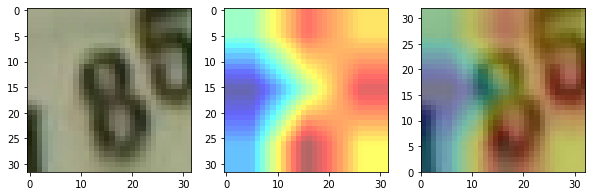

In [0]:
import cv2

def plot_3_3():
  k=0
  model = load_model_from_file(base_dir, "model_2_2")
  last_conv_layer = model.get_layer('conv2d_31')
  img = rgb2gray(X_test)[k]
  #img = tf.keras.preprocessing.image.img_to_array(img)
  grad_model = tf.keras.models.Model([model.inputs], [model.get_layer('conv2d_31').output, model.output])

  with tf.GradientTape() as tape:
      conv_outputs, predictions = grad_model(np.array([img]))
      loss = predictions[:, np.argmax(y_test[k])]

  output = conv_outputs[0]
  grads = tape.gradient(loss, conv_outputs)[0]

  gate_f = tf.cast(output > 0, 'float32')
  gate_r = tf.cast(grads > 0, 'float32')
  guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads
  weights = tf.reduce_mean(guided_grads, axis=(0, 1))

  #weights = tf.reduce_mean(grads, axis=(0, 1))

  cam = np.ones(output.shape[0: 2], dtype = np.float32)
  for i, w in enumerate(weights):
      cam += w * output[:, :, i]
  o = cam.numpy()
  cam = cv2.resize(cam.numpy(), (32, 32))
  cam = np.maximum(cam, 0)

  heatmap = (cam - cam.min()) / (cam.max() - cam.min())
  cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
  output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)


  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,10))

  ax1.imshow(X_test[k])
  ax2.imshow(output_image, alpha=0.6)

  extent = 0,32,0,32
  im1 = ax3.imshow(X_test[k],
                  extent=extent)

  im2 = ax3.imshow(output_image, alpha=.3, 
                  extent=extent)

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_31 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_233 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_234 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_235 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_236 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_123 (Dropout)        (None, 32)              

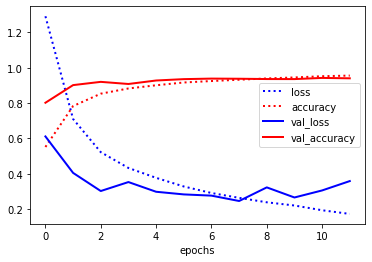

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():

  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  for layer in vgg_conv.layers[0:6]:
      layer.trainable = False


  # Create the model
  model = models.Sequential()
  # Add the vgg convolutional base model
  model.add(vgg_conv)
  # Add new layers
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  
  # Show a summary of the model. Check the number of trainable parameters
  model.summary()
  model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.9),
          loss='categorical_crossentropy',
          metrics=['accuracy'])


  return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir,
               train=False, epochs=12, batch_size=256)
answer_q_4_1 = """
               At first all convolutional layers from VGG16 had been frozen. 
               Trying different dense layers configuration and tuning optimizer resulted in validation accuracy around 85%. It was hard to get better result.
               After unfreezing last block of convolutional layers from VGG, the model score increased to 90%. It was very good performance, but still not satisfing.
               The quick observation, that unfreezing more layers improved the model performance, finally resulted in unfreezing 3 blocks of convolutional last layers.
               It means that almost entire VGG was retrained. And the final score was above 94%. 
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
import pickle
import gzip

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  pass

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  pass

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pass

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  pass

answer_q_4_2 = """
               Not done
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: None
Answer is 40 characters long
